In [ ]:
# Importing the Libraries
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as nn
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
from textblob import TextBlob

In [80]:
#uploading csv file
#the entire dataset is imported in CSV file
from google.colab import files
uploaded = files.upload()

Saving twitter_data_filtered.csv to twitter_data_filtered.csv


In [ ]:
#created dataframe
import io
dataframe = pd.read_csv(io.BytesIO(uploaded['nyt_data.csv']))
dataframe.head()

,PullDate,text,id
0,2022-11-01,Op-Ed article by Democratic Rep Jim Cooper on ...,1
1,2022-11-01,With insurers saying they will no longer resci...,2
2,2022-11-01,Abitibi Paper Co rolls back $8‐a‐ton newsprint...,3
3,2022-11-01,"After Sept. 23, insurers will be permitted to ...",4
4,2022-11-01,order to remove royal flag from ships cited as...,5


In [ ]:
dataframe.tail()

,PullDate,text,id
240075,2022-11-22,Some 16 ins cos that had issued $45-million ma...,240076
240076,2022-11-22,The Pentagon took the offensive in copper last...,240077
240077,2022-11-22,City rent comm seen rescinding rises based on ...,240078
240078,2022-11-22,pors and illus,240079
240079,2022-11-22,Gen Booth's solicitors win delay of Council he...,240080


In [ ]:
dataframe.describe()

,id
count,240080.000000
mean,120040.500000
std,69305.270651
min,1.000000
25%,60020.750000
50%,120040.500000
75%,180060.250000
max,240080.000000


In [ ]:
# Iterating through the .csv data file and converting entire csv data into the text file
review_words= " "
for i in dataframe.text: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    review_words += " ".join(separate)+" "

In [ ]:
print(dataframe.text)

0         Op-Ed article by Democratic Rep Jim Cooper on ...
1         With insurers saying they will no longer resci...
2         Abitibi Paper Co rolls back $8‐a‐ton newsprint...
3         After Sept. 23, insurers will be permitted to ...
4         order to remove royal flag from ships cited as...
                                ...                        
240075    Some 16 ins cos that had issued $45-million ma...
240076    The Pentagon took the offensive in copper last...
240077    City rent comm seen rescinding rises based on ...
240078                                       pors and illus
240079    Gen Booth's solicitors win delay of Council he...
Name: text, Length: 240080, dtype: object


In [ ]:
#creating stop-words and review_words
stop_words = set(STOPWORDS) 
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 4).generate(review_words) 

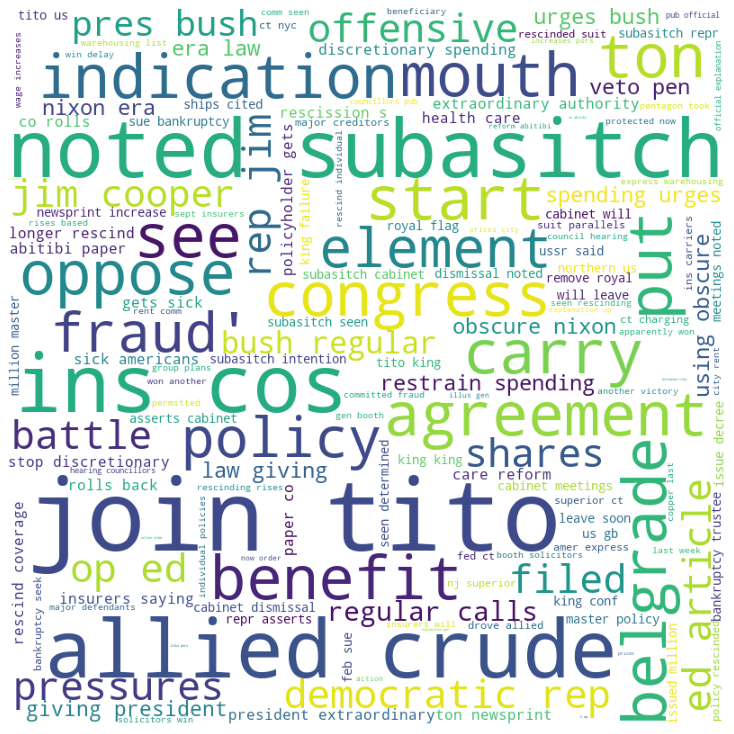

In [ ]:
# Plotting the WordCloud                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
def word_frequency(text):
    plt.figure(figsize=(8, 8))
    plt.xlabel('Word Length')
    plt.ylabel('Number of occurences')
    plt.title('Word Frequency Graph')
    plt.grid(True)
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

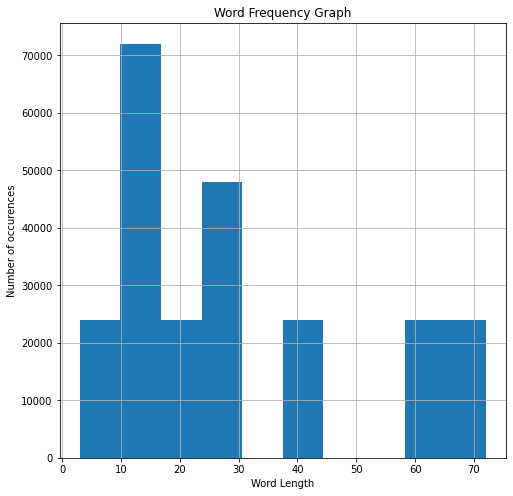

In [ ]:
word_frequency(dataframe['text'])

In [ ]:
def sentimental_score(text):
    
    def classification(text):
        return TextBlob(text).sentiment.polarity   
    polarity_score = text.apply(lambda x : classification(x))
    #print(polarity_score)
    plt.xlabel('Score range ')
    plt.ylabel('Number of occurences')
    plt.title('Sentimental Analysis Score')
    polarity_score.hist(color = "blue")

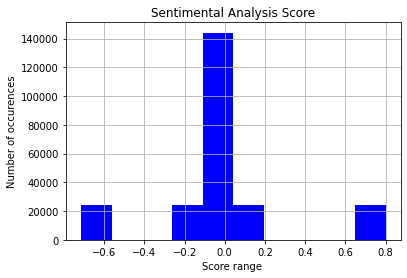

In [ ]:
sentimental_score(dataframe['text'])